# Neural Networks

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

## Load dataset

In [2]:
def loadMNISTdataset():
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    width, height = (x_train.shape[1], x_train.shape[2])

    # Reshape dataset to have a single channel, 
    # converting from integers to floats, and  
    # normalizing they range to [0-1]
    x_train = x_train.reshape(x_train.shape[0], 3*width*height).astype('float32') / 255
    x_test = x_test.reshape(x_test.shape[0], 3*width*height).astype('float32') / 255

    # Converting to one-hot encode for the target values
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)
    return (x_train, y_train, x_test, y_test, width, height)

label_dict = {    
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

In [3]:
x_train, y_train, x_test, y_test, width, height = loadMNISTdataset()

In [4]:
3*32*32

3072

Text(0.5, 1.0, 'truck')

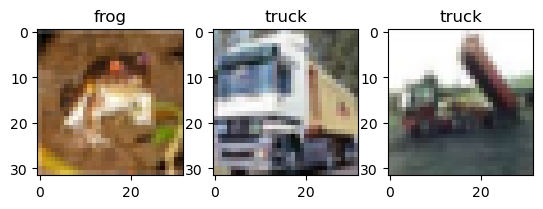

In [5]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(x_train[0, :3*width*height].reshape(width, height, 3))
ax[0].set_title(label_dict[np.argmax(y_train[0, :])])
ax[1].imshow(x_train[1, :3*width*height].reshape(width, height, 3))
ax[1].set_title(label_dict[np.argmax(y_train[1, :])])
ax[2].imshow(x_train[2, :3*width*height].reshape(width, height, 3))
ax[2].set_title(label_dict[np.argmax(y_train[2, :])])

## Defining the model

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(8, activation="relu", input_shape=(3*width*height, )))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

## Train Model

In [15]:
nEpochs = 30
batchSize = 64

NValid = int(0.1*x_train.shape[0])
x_valid, y_valid = x_train[:NValid, :], y_train[:NValid, :]
x_train, y_train = x_train[NValid:, :], y_train[NValid:, :]

In [16]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
def plotTrainingHistory(history):
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='gray', label='test')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='orange', label='train')
    plt.plot(history.history['val_accuracy'], color='gray', label='test')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [18]:
history = model.fit(x_train, y_train, epochs=nEpochs, batch_size=batchSize,
                    validation_data=[x_valid, y_valid])

Epoch 1/30
633/633 [==============================] - 6s 6ms/step - loss: 2.2098 - accuracy: 0.1628 - val_loss: 2.0858 - val_accuracy: 0.2013
Epoch 2/30
633/633 [==============================] - 3s 5ms/step - loss: 2.0177 - accuracy: 0.2398 - val_loss: 1.9758 - val_accuracy: 0.2533
Epoch 3/30
633/633 [==============================] - 2s 3ms/step - loss: 1.9574 - accuracy: 0.2595 - val_loss: 1.9342 - val_accuracy: 0.2776
Epoch 4/30
633/633 [==============================] - 2s 3ms/step - loss: 1.9236 - accuracy: 0.2791 - val_loss: 1.9054 - val_accuracy: 0.2936
Epoch 5/30
633/633 [==============================] - 3s 5ms/step - loss: 1.8943 - accuracy: 0.2938 - val_loss: 1.9199 - val_accuracy: 0.2807
Epoch 6/30
633/633 [==============================] - 2s 3ms/step - loss: 1.8793 - accuracy: 0.3028 - val_loss: 1.8682 - val_accuracy: 0.3071
Epoch 7/30
633/633 [==============================] - 2s 3ms/step - loss: 1.8597 - accuracy: 0.3121 - val_loss: 1.8548 - val_accuracy: 0.3153
Epoch 

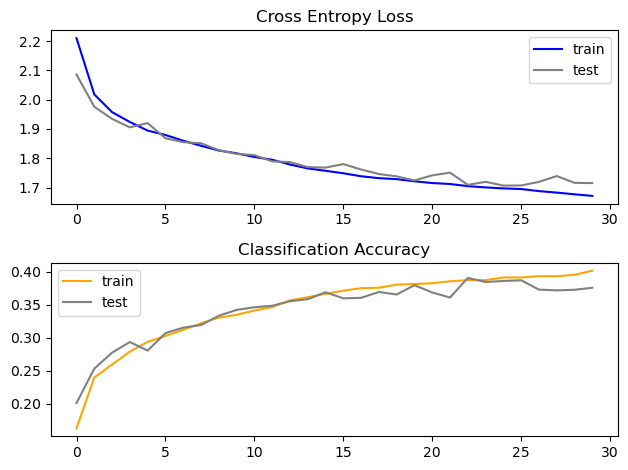

In [20]:
plotTrainingHistory(history=history)

## Test the model

In [24]:
def showErrors(model, x_test, y_test, width, height):
    y_hat = np.argmax(model.predict(x_test), axis=-1)
    y_test_array = y_test.argmax(1)
    test_wrong = [im for im in zip(x_test,y_hat,y_test_array) if im[1] != im[2]]
    plt.figure(figsize=(15, 15))
    for ind, val in enumerate(test_wrong[:20]):
        plt.subplot(10, 10, ind + 1)

        predictLabel = label_dict[val[1]]
        correctLabel = label_dict[val[2]]

        im = val[0].reshape((width,height,3))
        plt.axis("off")
        plt.text(0, -0.5, correctLabel, fontsize=14, color='green') # correct
        plt.text(0, -5.0, predictLabel, fontsize=14, color='red')  # predicted

        plt.imshow(im, cmap='gray')
    plt.tight_layout()
    plt.show()

313/313 [==============================] - 1s 2ms/step


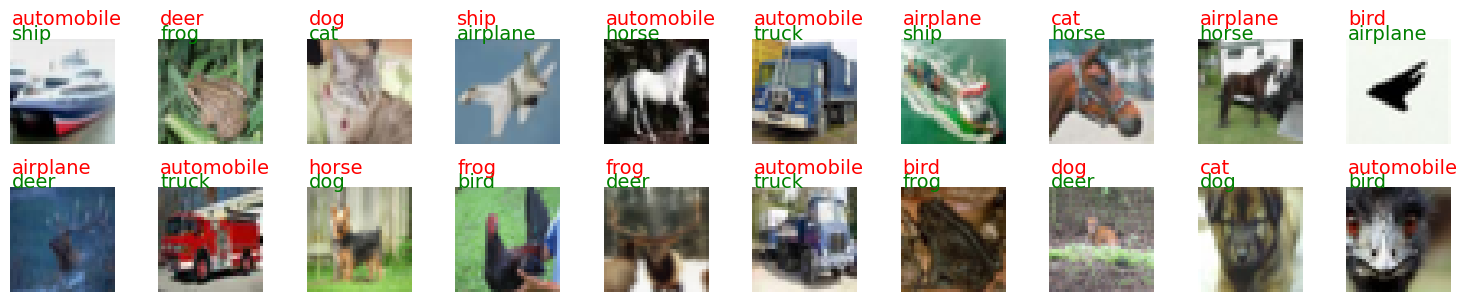

In [25]:
showErrors(model, x_test, y_test, width, height)